In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import scipy
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Iris flower data.csv')

In [3]:
df.head()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN


In [4]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [5]:
df.shape

(344, 12)

In [6]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In [7]:
df= df.drop(['studyName', 'Sample Number', 'Individual ID', 'Date Egg', 'Comments'], axis=1)
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


## Preprocessing
|Sr.No.| Step | Option 1 | Option 2 |
|---| --- | --- | --- |
|1| Missing value | info | isnull |
|2| Encoding |  |  |
|3| Outlier | boxplot |  |
|4| Feature scaling |  |  |
|5| Imbalance |  |  |

In [9]:
# Handle missing value
df.isnull().sum()/len(df)*100

Species                0.000000
Island                 0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [11]:
df['Flipper Length (mm)'].value_counts()

190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: Flipper Length (mm), dtype: int64

In [12]:
df['Flipper Length (mm)'].value_counts()

3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 95, dtype: int64

In [14]:
df['Flipper Length (mm)'].replace(to_replace='.', value= np.nan, inplace= True)
df['Flipper Length (mm)']= pd.to_numeric(df['Flipper Length (mm)'])

In [15]:
df['Body Mass (g)'].replace(to_replace='.', value= np.nan, inplace= True)
df['Body Mass (g)']= pd.to_numeric(df['Body Mass (g)'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    float64
 5   Body Mass (g)        341 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [17]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     3
Body Mass (g)           3
Sex                    10
dtype: int64

In [18]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [20]:
df['Sex'].replace(to_replace='.', value= np.nan, inplace= True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    float64
 5   Body Mass (g)        341 non-null    float64
 6   Sex                  333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [22]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
Name: Sex, dtype: int64

In [23]:
df['Sex']= df['Sex'].fillna('MALE')

In [24]:
df['Culmen Depth (mm)']= df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].median())
df['Culmen Length (mm)']= df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].median())
df['Flipper Length (mm)']= df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].median())
df['Body Mass (g)']= df['Body Mass (g)'].fillna(df['Body Mass (g)'].median())

In [25]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [26]:
# Encoding
df['Island']= df['Island'].astype('category')
df['Island']= df['Island'].cat.codes

df['Sex']= df['Sex'].astype('category')
df['Sex']= df['Sex'].cat.codes

In [27]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),2,39.10,18.7,181.0,4050.0,1
1,Adelie Penguin (Pygoscelis adeliae),2,39.50,17.4,186.0,3800.0,0
2,Adelie Penguin (Pygoscelis adeliae),2,40.30,18.0,197.0,3250.0,0
3,Adelie Penguin (Pygoscelis adeliae),2,44.45,17.3,197.0,4050.0,1
4,Adelie Penguin (Pygoscelis adeliae),2,36.70,19.3,193.0,3450.0,0


In [28]:
df= pd.get_dummies(df, columns=['Island', 'Sex'])
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_0,Island_1,Island_2,Sex_0,Sex_1
0,Adelie Penguin (Pygoscelis adeliae),39.10,18.7,181.0,4050.0,0,0,1,0,1
1,Adelie Penguin (Pygoscelis adeliae),39.50,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie Penguin (Pygoscelis adeliae),40.30,18.0,197.0,3250.0,0,0,1,1,0
3,Adelie Penguin (Pygoscelis adeliae),44.45,17.3,197.0,4050.0,0,0,1,0,1
4,Adelie Penguin (Pygoscelis adeliae),36.70,19.3,193.0,3450.0,0,0,1,1,0


In [29]:
df= df.drop(['Island_2', 'Sex_1'], axis=1)
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_0,Island_1,Sex_0
0,Adelie Penguin (Pygoscelis adeliae),39.10,18.7,181.0,4050.0,0,0,0
1,Adelie Penguin (Pygoscelis adeliae),39.50,17.4,186.0,3800.0,0,0,1
2,Adelie Penguin (Pygoscelis adeliae),40.30,18.0,197.0,3250.0,0,0,1
3,Adelie Penguin (Pygoscelis adeliae),44.45,17.3,197.0,4050.0,0,0,0
4,Adelie Penguin (Pygoscelis adeliae),36.70,19.3,193.0,3450.0,0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Culmen Length (mm)   344 non-null    float64
 2   Culmen Depth (mm)    344 non-null    float64
 3   Flipper Length (mm)  344 non-null    float64
 4   Body Mass (g)        344 non-null    float64
 5   Island_0             344 non-null    uint8  
 6   Island_1             344 non-null    uint8  
 7   Sex_0                344 non-null    uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 14.6+ KB


In [31]:
# Handle outlier
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Culmen Length (mm),344.0,43.925000,5.443792,32.1,39.275,44.45,48.5,59.6
Culmen Depth (mm),344.0,17.152035,1.969060,13.1,15.600,17.30,18.7,21.5
Flipper Length (mm),344.0,200.898256,14.021791,172.0,190.000,197.00,213.0,231.0
Body Mass (g),344.0,4201.744186,799.366921,2700.0,3550.000,4050.00,4750.0,6300.0
Island_0,344.0,0.488372,0.500593,0.0,0.000,0.00,1.0,1.0
Island_1,344.0,0.360465,0.480835,0.0,0.000,0.00,1.0,1.0
Sex_0,344.0,0.479651,0.500313,0.0,0.000,0.00,1.0,1.0


In [32]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Island_0', 'Island_1',
       'Sex_0'],
      dtype='object')

In [33]:
df['Species'].value_counts()

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

There is no imbalance data.

In [35]:
# Split the data into x and y
x= df.iloc[:, 1:]
y= df['Species']

In [36]:
x

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_0,Island_1,Sex_0
0,39.10,18.7,181.0,4050.0,0,0,0
1,39.50,17.4,186.0,3800.0,0,0,1
2,40.30,18.0,197.0,3250.0,0,0,1
3,44.45,17.3,197.0,4050.0,0,0,0
4,36.70,19.3,193.0,3450.0,0,0,1
...,...,...,...,...,...,...,...
339,44.45,17.3,197.0,4050.0,1,0,0
340,46.80,14.3,215.0,4850.0,1,0,1
341,50.40,15.7,222.0,5750.0,1,0,0
342,45.20,14.8,212.0,5200.0,1,0,1


In [37]:
y

0      Adelie Penguin (Pygoscelis adeliae)
1      Adelie Penguin (Pygoscelis adeliae)
2      Adelie Penguin (Pygoscelis adeliae)
3      Adelie Penguin (Pygoscelis adeliae)
4      Adelie Penguin (Pygoscelis adeliae)
                      ...                 
339      Gentoo penguin (Pygoscelis papua)
340      Gentoo penguin (Pygoscelis papua)
341      Gentoo penguin (Pygoscelis papua)
342      Gentoo penguin (Pygoscelis papua)
343      Gentoo penguin (Pygoscelis papua)
Name: Species, Length: 344, dtype: object

In [38]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaler= scaler.fit_transform(x)

Preprocessing part completed.

## EDA

In [39]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Island_0', 'Island_1',
       'Sex_0'],
      dtype='object')

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

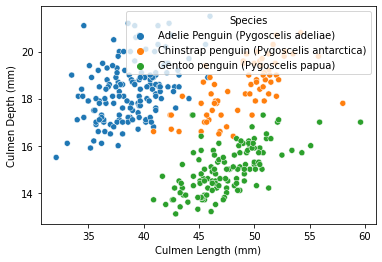

In [40]:
sns.scatterplot(x= 'Culmen Length (mm)', y= 'Culmen Depth (mm)', data= df, hue= 'Species')

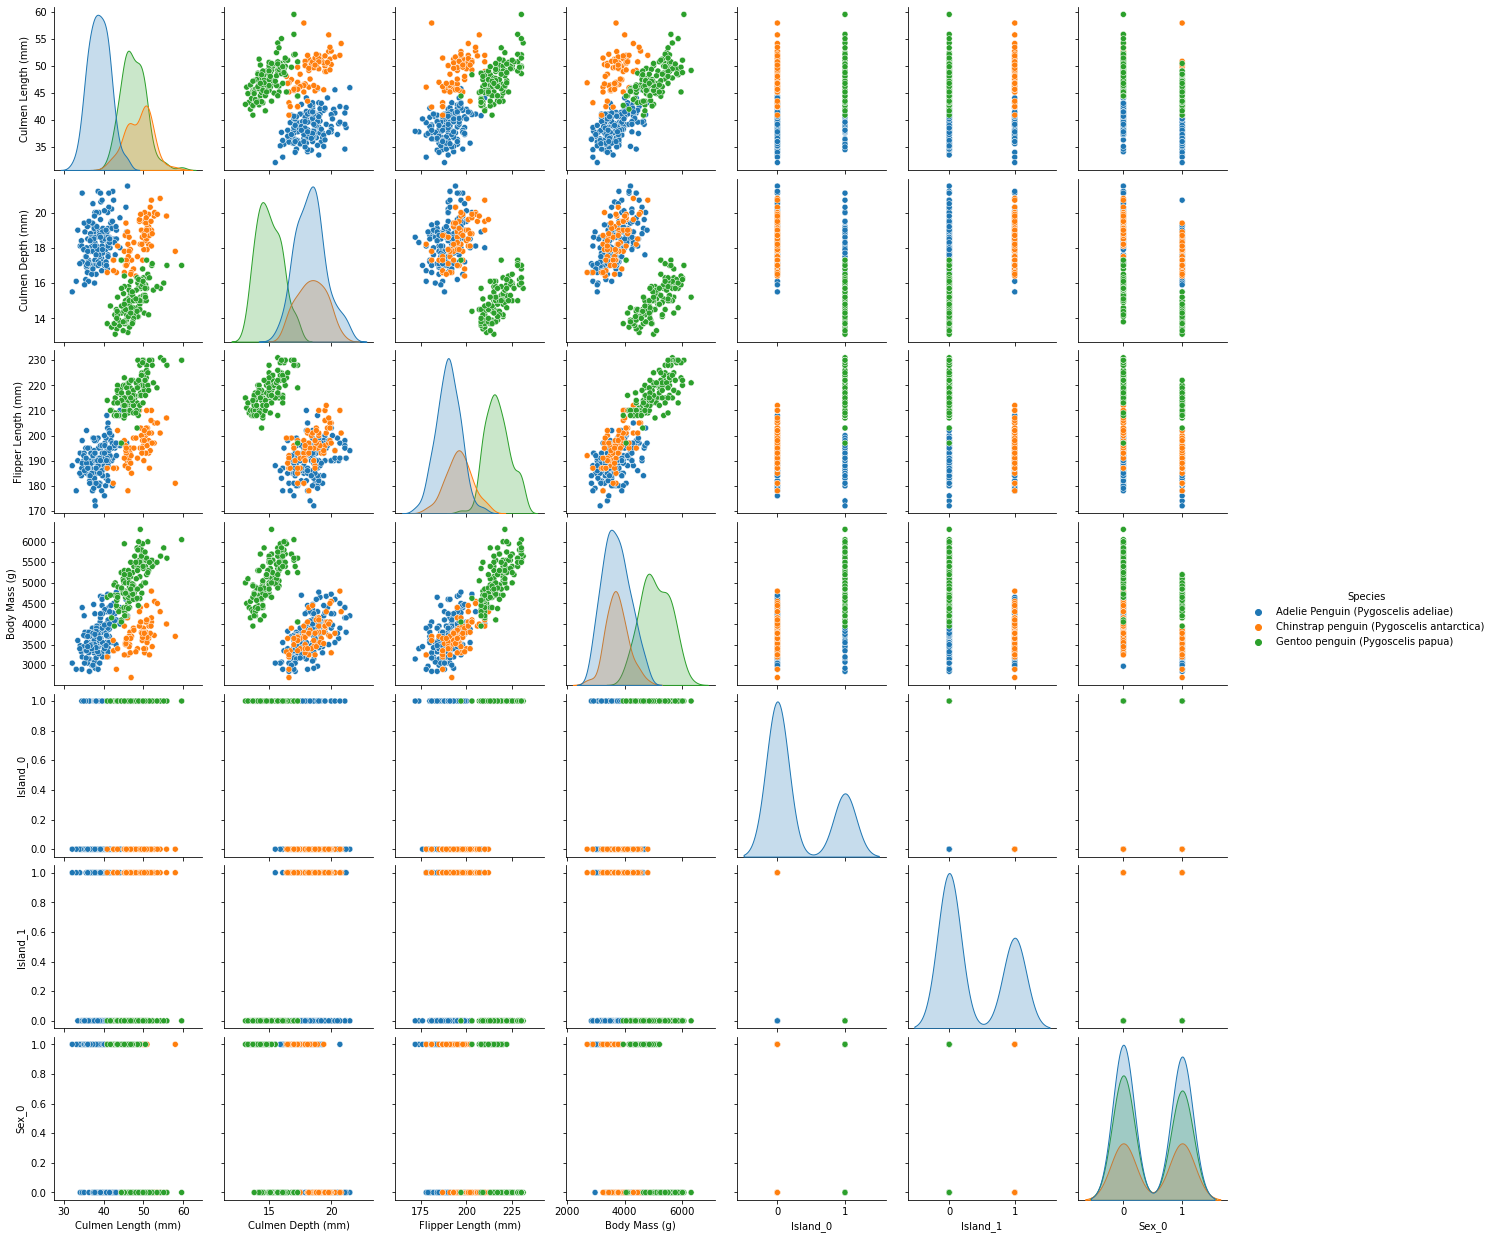

In [42]:
sns.pairplot(data= df, hue='Species')
plt.show()

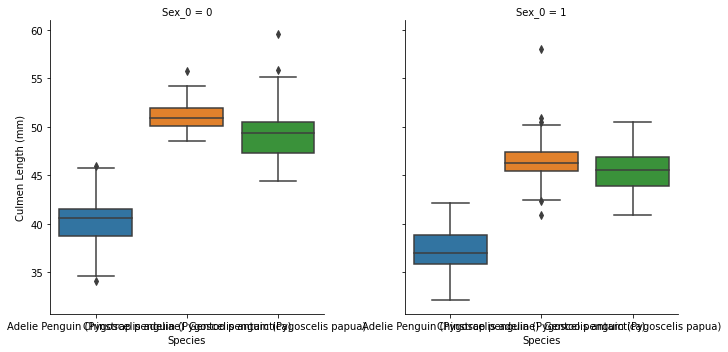

In [44]:
sns.catplot(data= df, x='Species', y='Culmen Length (mm)', kind='box', col='Sex_0')

In [45]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_scaler, y, test_size=0.3, random_state=0)

In [47]:
# Decision tree Gini
from sklearn.tree import DecisionTreeClassifier
dt_g=DecisionTreeClassifier(criterion='gini')
dt_g.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
# Decision tree Entropy
from sklearn.tree import DecisionTreeClassifier
dt_e=DecisionTreeClassifier(criterion='entropy')
dt_e.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
y_pred_train_g= dt_g.predict(x_train)
y_pred_test_g= dt_g.predict(x_test)

In [50]:
y_pred_train_e= dt_e.predict(x_train)
y_pred_test_e= dt_e.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_train, y_pred_train_g))
print('........................................')
print(confusion_matrix(y_test, y_pred_test_g))

[[101   0   0]
 [  0  52   0]
 [  0   0  87]]
........................................
[[51  0  0]
 [ 0 16  0]
 [ 0  0 37]]


In [53]:
print(classification_report(y_train, y_pred_train_g))
print('........................................')
print(classification_report(y_test, y_pred_test_g))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00       101
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        52
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        87

                                 accuracy                           1.00       240
                                macro avg       1.00      1.00      1.00       240
                             weighted avg       1.00      1.00      1.00       240

........................................
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00        51
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        16
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        37

                                 accuracy

In [54]:
print(accuracy_score(y_train, y_pred_train_g))
print('........................................')
print(accuracy_score(y_test, y_pred_test_g))

1.0
........................................
1.0


In [55]:
print(accuracy_score(y_train, y_pred_train_e))
print('........................................')
print(accuracy_score(y_test, y_pred_test_e))

1.0
........................................
0.9903846153846154


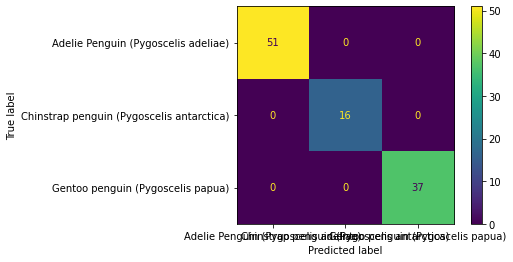

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_g, x_test, y_test)
plt.show()

In [57]:
dt_g.feature_importances_

array([0.37922384, 0.00729049, 0.50068241, 0.        , 0.04350808,
       0.03858894, 0.03070624])

In [58]:
pd.DataFrame(index= x.columns, data= dt_g.feature_importances_, columns=['Feature importance'])

,Feature importance
Culmen Length (mm),0.379224
Culmen Depth (mm),0.007290
Flipper Length (mm),0.500682
Body Mass (g),0.000000
Island_0,0.043508
Island_1,0.038589
Sex_0,0.030706


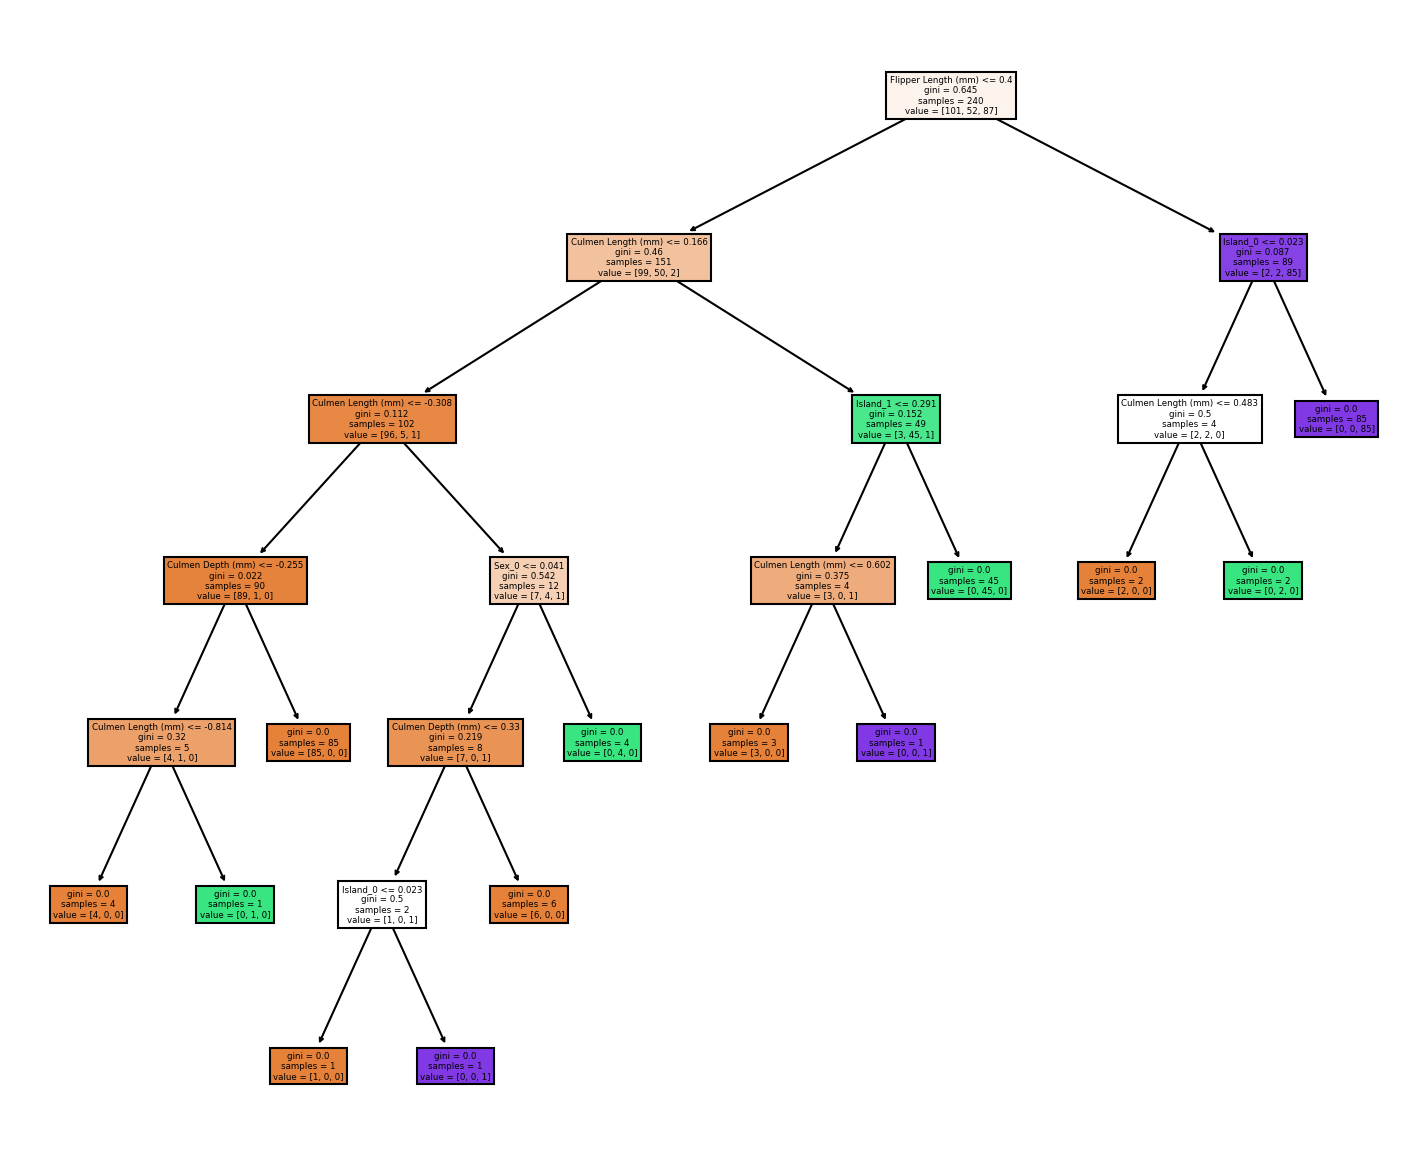

In [59]:
# plot Decision tree
from sklearn.tree import plot_tree
plt.figure(figsize= (12,10), dpi=150)
plot_tree(dt_g, filled=True, feature_names= x.columns)
plt.show()

In [61]:
# Prunning
dt_g_depth_2= DecisionTreeClassifier(max_depth=2)
dt_g_depth_2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [62]:
y_pred_test_depth_2= dt_g_depth_2.predict(x_test)
accuracy_score(y_test, y_pred_test_depth_2)

0.9615384615384616

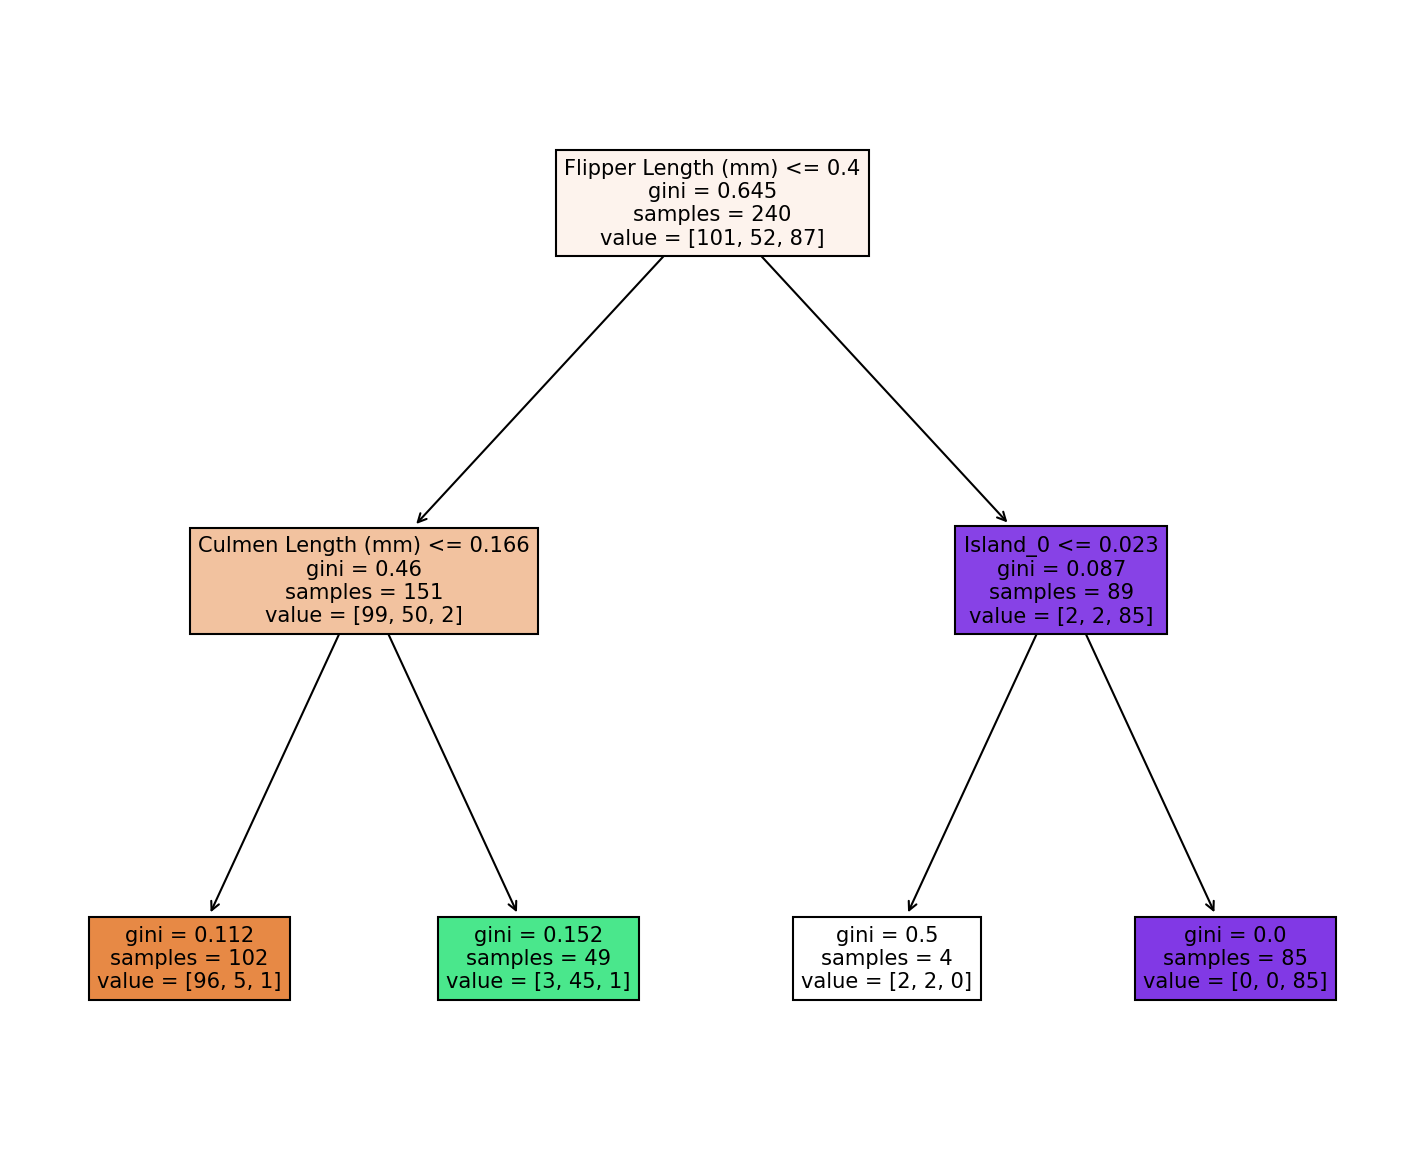

In [63]:
from sklearn.tree import plot_tree
plt.figure(figsize= (12,10), dpi=150)
plot_tree(dt_g_depth_2, filled=True, feature_names= x.columns)
plt.show()